Q1: Import the Dataset and Examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

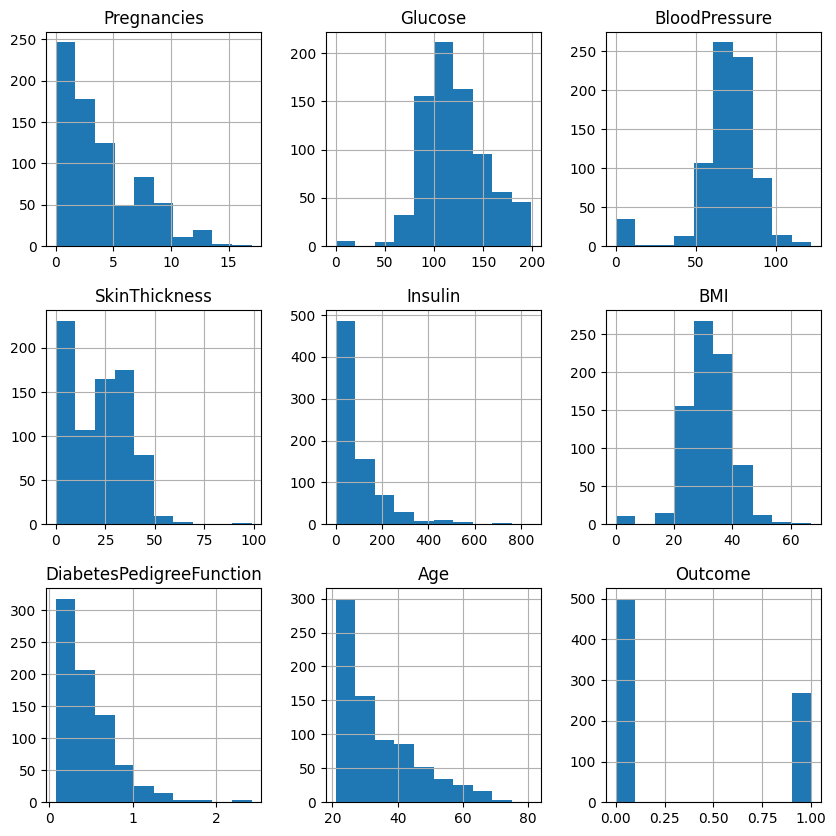

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
print(df.head())
print(df.describe())
print(df.info())
df.hist(figsize=(10, 10))
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [5]:
print(df.isnull().sum())
df = pd.get_dummies(df, drop_first=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [9]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7922077922077922, Precision: 0.7446808510638298, Recall: 0.6363636363636364, F1 Score: 0.6862745098039216


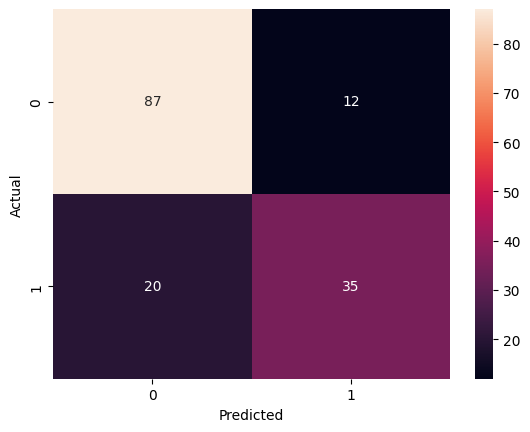

In [10]:
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

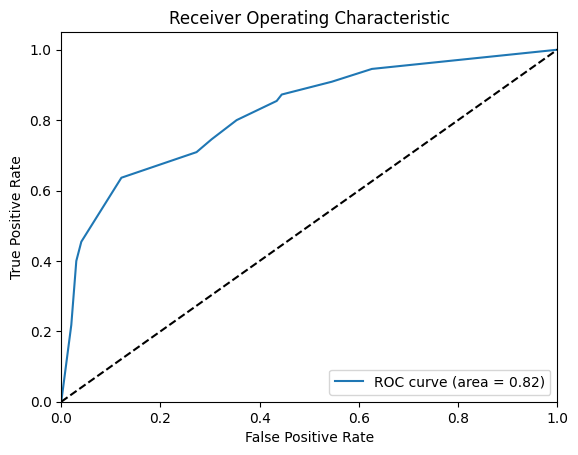

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

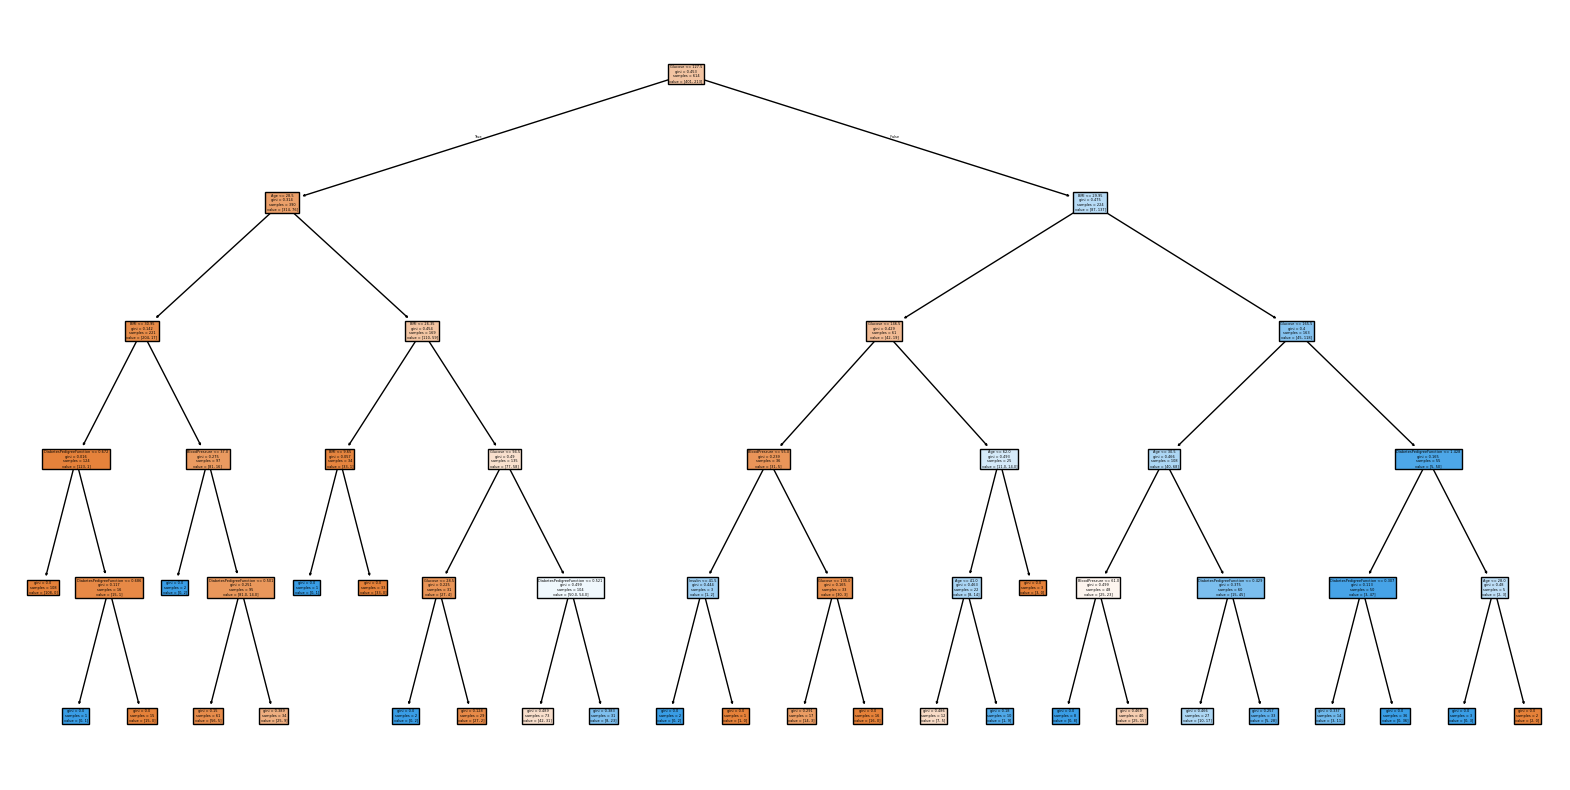

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [ ]:
new_data = pd.read_csv('new_data.csv')
# Example preprocessing steps
new_data = new_data.dropna()  # Handle missing values
new_data = pd.get_dummies(new_data, drop_first=True)  # Convert categorical variables
new_data = new_data.reindex(columns=X.columns, fill_value=0)
new_predictions = best_model.predict(new_data)
print(new_predictions)
def sensitivity_analysis(model, input_data, feature, change_range):
    results = {}
    for change in change_range:
        modified_data = input_data.copy()
        modified_data[feature] += change
        prediction = model.predict(modified_data)
        results[change] = prediction
    return results
glucose_changes = np.arange(-10, 11, 1)  # Change glucose levels from -10 to +10
sensitivity_results = sensitivity_analysis(best_model, X_test, 'Glucose', glucose_changes)
print(sensitivity_results)
scenarios = pd.DataFrame({
    'Pregnancies': [0, 1, 2],
    'Glucose': [50, 100, 150],
    'BloodPressure': [60, 80, 100],
    'SkinThickness': [10, 20, 30],
    'Insulin': [0, 100, 200],
    'BMI': [18.5, 25.0, 30.0],
    'DiabetesPedigreeFunction': [0.1, 0.5, 0.9],
    'Age': [20, 40, 60]
})

# Make predictions for each scenario
scenario_predictions = best_model.predict(scenarios)
print(scenario_predictions)

plt.figure(figsize=(10, 6))
plt.plot(glucose_changes, list(sensitivity_results.values()), marker='o')
plt.title('Sensitivity Analysis of Glucose Levels')
plt.xlabel('Change in Glucose Level')
plt.ylabel('Predicted Outcome')
plt.grid()
plt.show()